In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Multiclass Classification

Data IMmporting

In [2]:
#this data already apart as train and test 
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [4]:
#Show the first data
print(f"Traning Sample:\n{train_data[0]}\n")
print(f"Traning Label:\n{train_labels[0]}\n")

Traning Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

2
(10000, 28, 28)


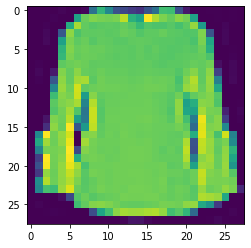

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[8888])
print(train_labels[7])
print(test_data.shape)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

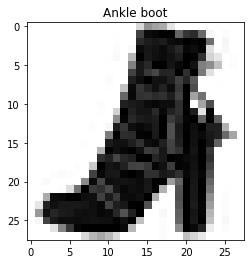

In [7]:
# Plot and example image and its label
index=11
plt.imshow(train_data[index],cmap=plt.cm.binary)# gray scale
plt.title(class_names[train_labels[index]])

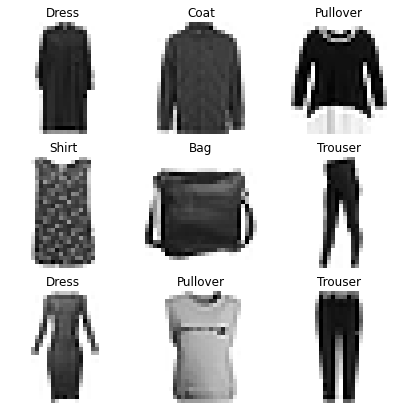

In [8]:
#Plotting multiple images
import random
plt.figure(figsize=(7,7))
for i in range(9):
    ax=plt.subplot(3,3,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

# Building a model

Nearly same as binary but output is differs
for this example
* input shape= 28x28
* output shape= 10
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = softmax(not sigmoid)


* önemli noktalar 
Model oluştururken giriş ve çıkış layersları 
CategoricalCrossentropy(),tf.one_hot()
SparseCategoricalCrossentropy()


In [9]:

#Set Random Seed
tf.random.set_seed(42)

#1 Create model
model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
#3 fit model
hist_1=model_1.fit(train_data,
                 tf.one_hot(train_labels, depth=10),
                 epochs=10,
                validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1595 - accuracy: 0.1630 - val_loss: 1.8121 - val_accuracy: 0.2138
Epoch 2/10
1875/1875 [==============================] - 2s 926us/step - loss: 1.7001 - accuracy: 0.2530 - val_loss: 1.6497 - val_accuracy: 0.2853
Epoch 3/10
1875/1875 [==============================] - 2s 918us/step - loss: 1.6252 - accuracy: 0.2843 - val_loss: 1.6026 - val_accuracy: 0.2916
Epoch 4/10
1875/1875 [==============================] - 2s 905us/step - loss: 1.6016 - accuracy: 0.2903 - val_loss: 1.5929 - val_accuracy: 0.3068
Epoch 5/10
1875/1875 [==============================] - 2s 907us/step - loss: 1.5829 - accuracy: 0.3030 - val_loss: 1.5754 - val_accuracy: 0.3154
Epoch 6/10
1875/1875 [==============================] - 2s 906us/step - loss: 1.5676 - accuracy: 0.3153 - val_loss: 1.5407 - val_accuracy: 0.3322
Epoch 7/10
1875/1875 [==============================] - 2s 919us/step - loss: 1.5244 - accuracy: 0.3510 - val_loss: 1.4987 - v

In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Scaling 
train_data.min(),train_data.max()

(0, 255)

In [10]:
train_data_norm=train_data/255
test_data_norm= test_data/255
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [11]:
# Set Seed
tf.random.set_seed(42)

#1. create model

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#2. Compile
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
#fit

hist_2=model_2.fit(
    train_data_norm,
    tf.one_hot(train_labels,depth=10),
    epochs=10,
    validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 955us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - v

Scale edilen modellerde loss daha az

<AxesSubplot:title={'center':'Normalized data'}>

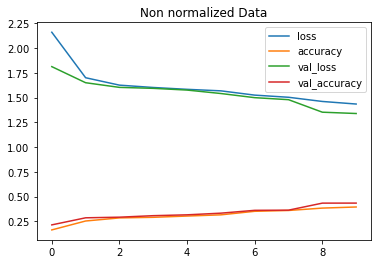

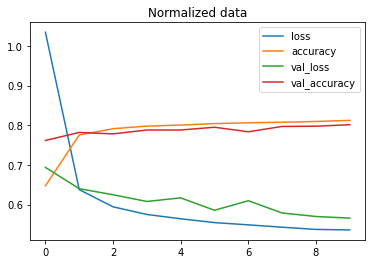

In [14]:
import pandas as pd

#plo. nOrmalize data
pd.DataFrame(hist_1.history).plot(title="Non normalized Data")
pd.DataFrame(hist_2.history).plot(title="Normalized data")

# Ideal Learning Rate

In [15]:
#Set seed
tf.random.set_seed(42)

#1.Create model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#2.compile the model

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
               )
#learning Rate callback
lr_schduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

#3. Fit the model
hist_3=model_3.fit(train_data_norm,
                  train_labels,
                  epochs=40,
                  validation_data=(test_data_norm,test_labels),
                  callbacks=[lr_schduler]
                  )

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 2s 928us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 2s 932us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 2s 939us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 2s 936us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 2s 936us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 2s 927us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - v

Text(0.5, 1.0, 'ideal Learning Rate')

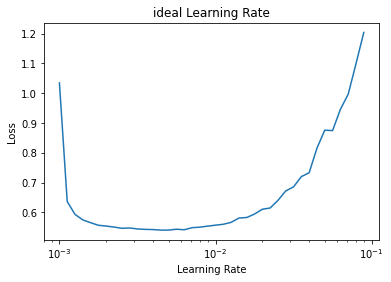

In [16]:
import numpy as np
import matplotlib.pyplot as plt

lrs= 1e-3*10**(tf.range(40)/20)
plt.semilogx(lrs, hist_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("ideal Learning Rate")

We just find the ,deal learning rate as

0.001

In [17]:
#Set seed
tf.random.set_seed(42)
#create model
model_4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
                        ])
# compiile the model
model_4.compile( 
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
               )
# Fit the nodel
hist_4=model_4.fit(train_data_norm, train_labels,
                  epochs=20,
                   validation_data=(test_data_norm,test_labels)
                  )

Epoch 1/20
1875/1875 [==============================] - 2s 975us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 2s 909us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 2s 901us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 2s 907us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 2s 910us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 2s 893us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 2s 912us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

# Evaluating the model

Make Confusion matrix as function

In [15]:
#THE CONFUSION MATRIX
#-------------------------------------------------
import itertools
from sklearn.metrics import confusion_matrix

def PrettyConfusionMatrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15 ):

    cm=confusion_matrix(y_true,y_pred)
    cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    n_classes=cm.shape[0]

    #Making prettify
    fig, ax= plt.subplots(figsize=figsize)
    # Create matrix Plot
    cax=ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #Create clases

    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])

    #axis labeling
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    #Set x axis to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust  label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size+10)
    #set thresh hold for different Colours
    threshold= (cm.max()+cm.min())/2

    #Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment= "center",
                color="white"  if cm[i,j]>threshold else "black",
                size=15)


In [19]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [20]:
#Some predictions
y_probs=model_4.predict(test_data_norm)
y_probs[0],class_names[tf.argmax(y_probs[0])]


(array([8.5630010e-11, 3.5361509e-13, 2.6633790e-05, 4.6356309e-08,
        5.0949828e-05, 9.6118778e-02, 8.1778076e-08, 9.1868974e-02,
        4.0605157e-03, 8.0787396e-01], dtype=float32),
 'Ankle boot')

In [21]:
y_preds=y_probs.argmax(axis=1)
y_preds[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [22]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [23]:
a=(y_preds==test_labels)
Count=0
for i in a:
    if i==True:
        Count=Count+1
print(Count)

8075


In [24]:
#basic matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

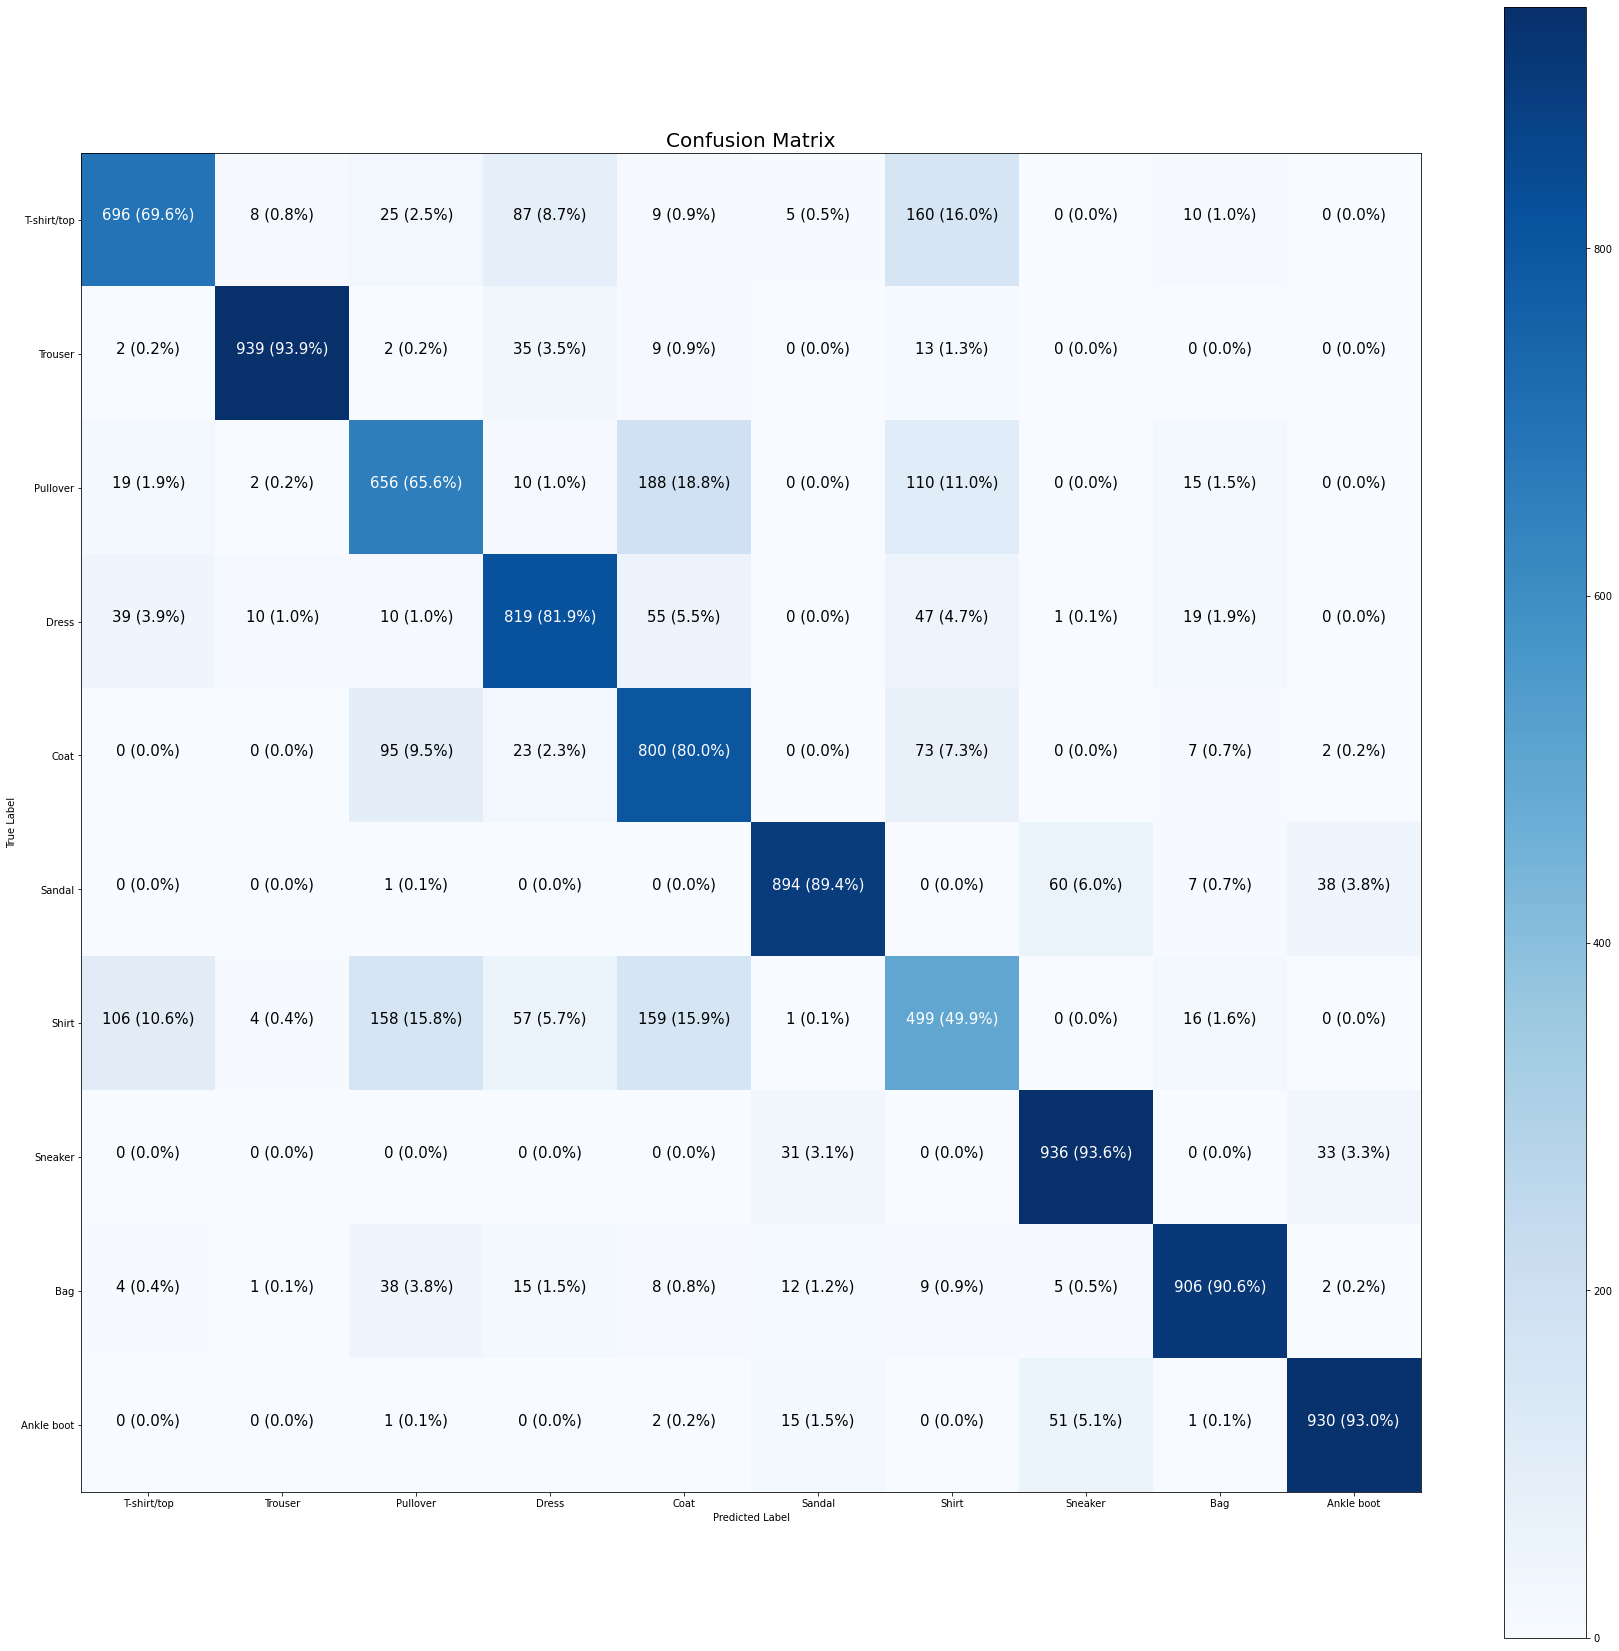

In [25]:
#prettyyyyyy
PrettyConfusionMatrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names,
                     figsize=(30,30),
                     text_size=10)

* plot a random image
* make prediction about that image
* label with also truth table

In [69]:
import random

def plot_random_image(model, images, true_labels, classes):
    """"
    Pics a image plot it with label 
    """
    #set up integer
    i = random.randint(0,len(images))
    #prediction
    target_image=images[i]
    pred_probs=model.predict(target_image.reshape(1,28,28))
    pred_label= classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    #plot iamge
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    #change color labels for correct or false predictions
    if pred_label==true_label:
        color="green"
    else:
        color= "red"
      
    plt.xlabel(f"Prediction:{pred_label} {(tf.reduce_max(pred_probs)*100):2.0f}% True image: {true_label}", color=color)
    

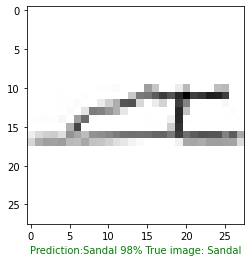

In [27]:
plot_random_image(model=model_4,
                  images=test_data_norm,
                  true_labels=test_labels, 
                  classes= class_names)

# Patterns of the Model

In [28]:
model_4.layers

In [29]:
model_4.layers[1]

In [30]:
#get the patterns of layers
weights, biasses =model_4.layers[1].get_weights()

weights,weights.shape

(array([[ 0.71502626, -0.06077087, -0.99763066, -1.0484314 ],
        [ 0.2773212 , -0.47155368, -0.52916497,  0.02329249],
        [ 0.7752427 ,  0.54027647, -1.1288565 , -0.7426154 ],
        ...,
        [-0.39453474,  0.47628683, -0.2264153 ,  0.2550589 ],
        [-0.40515766,  0.6181005 ,  0.23928462, -0.5038758 ],
        [ 0.23884599,  0.11606888, -0.12131304,  0.04352395]],
       dtype=float32),
 (784, 4))

In [31]:
#Check the biases
biasses,biasses.shape

(array([ 2.4485974e-02, -6.1485689e-04, -2.7230206e-01,  8.1124896e-01],
       dtype=float32),
 (4,))

the bias vector dictitates how much the patterns within the corresponding weights matrix should influence the next layer.


# Plot Model

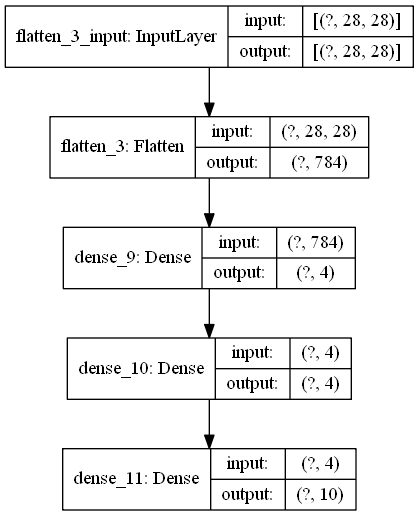

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes = True)

# Classssssifiedddd

In [12]:
#Set seed
tf.random.set_seed(42)
#create model
model_5=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(20,activation="relu"),
     tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
                        ])
# compiile the model
model_5.compile( 
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
               )
# Fit the nodel
hist_5=model_5.fit(train_data_norm, train_labels,
                  epochs=20,
                   validation_data=(test_data_norm,test_labels)
                  )

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5796 - accuracy: 0.8003 - val_loss: 0.4699 - val_accuracy: 0.8354
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4192 - accuracy: 0.8514 - val_loss: 0.4908 - val_accuracy: 0.8348
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3908 - accuracy: 0.8609 - val_loss: 0.4200 - val_accuracy: 0.8517
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3699 - accuracy: 0.8688 - val_loss: 0.4251 - val_accuracy: 0.8521
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3574 - accuracy: 0.8715 - val_loss: 0.4152 - val_accuracy: 0.8528
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3456 - accuracy: 0.8760 - val_loss: 0.4341 - val_accuracy: 0.8450
Epoch 7/20
1875/1875 [==============================] - 2s 988us/step - loss: 0.3381 - accuracy: 0.8780 - val_loss: 0.4284 - val_accurac

In [13]:
y_probs=model_5.predict(test_data_norm)
y_preds=y_probs.argmax(axis=1)

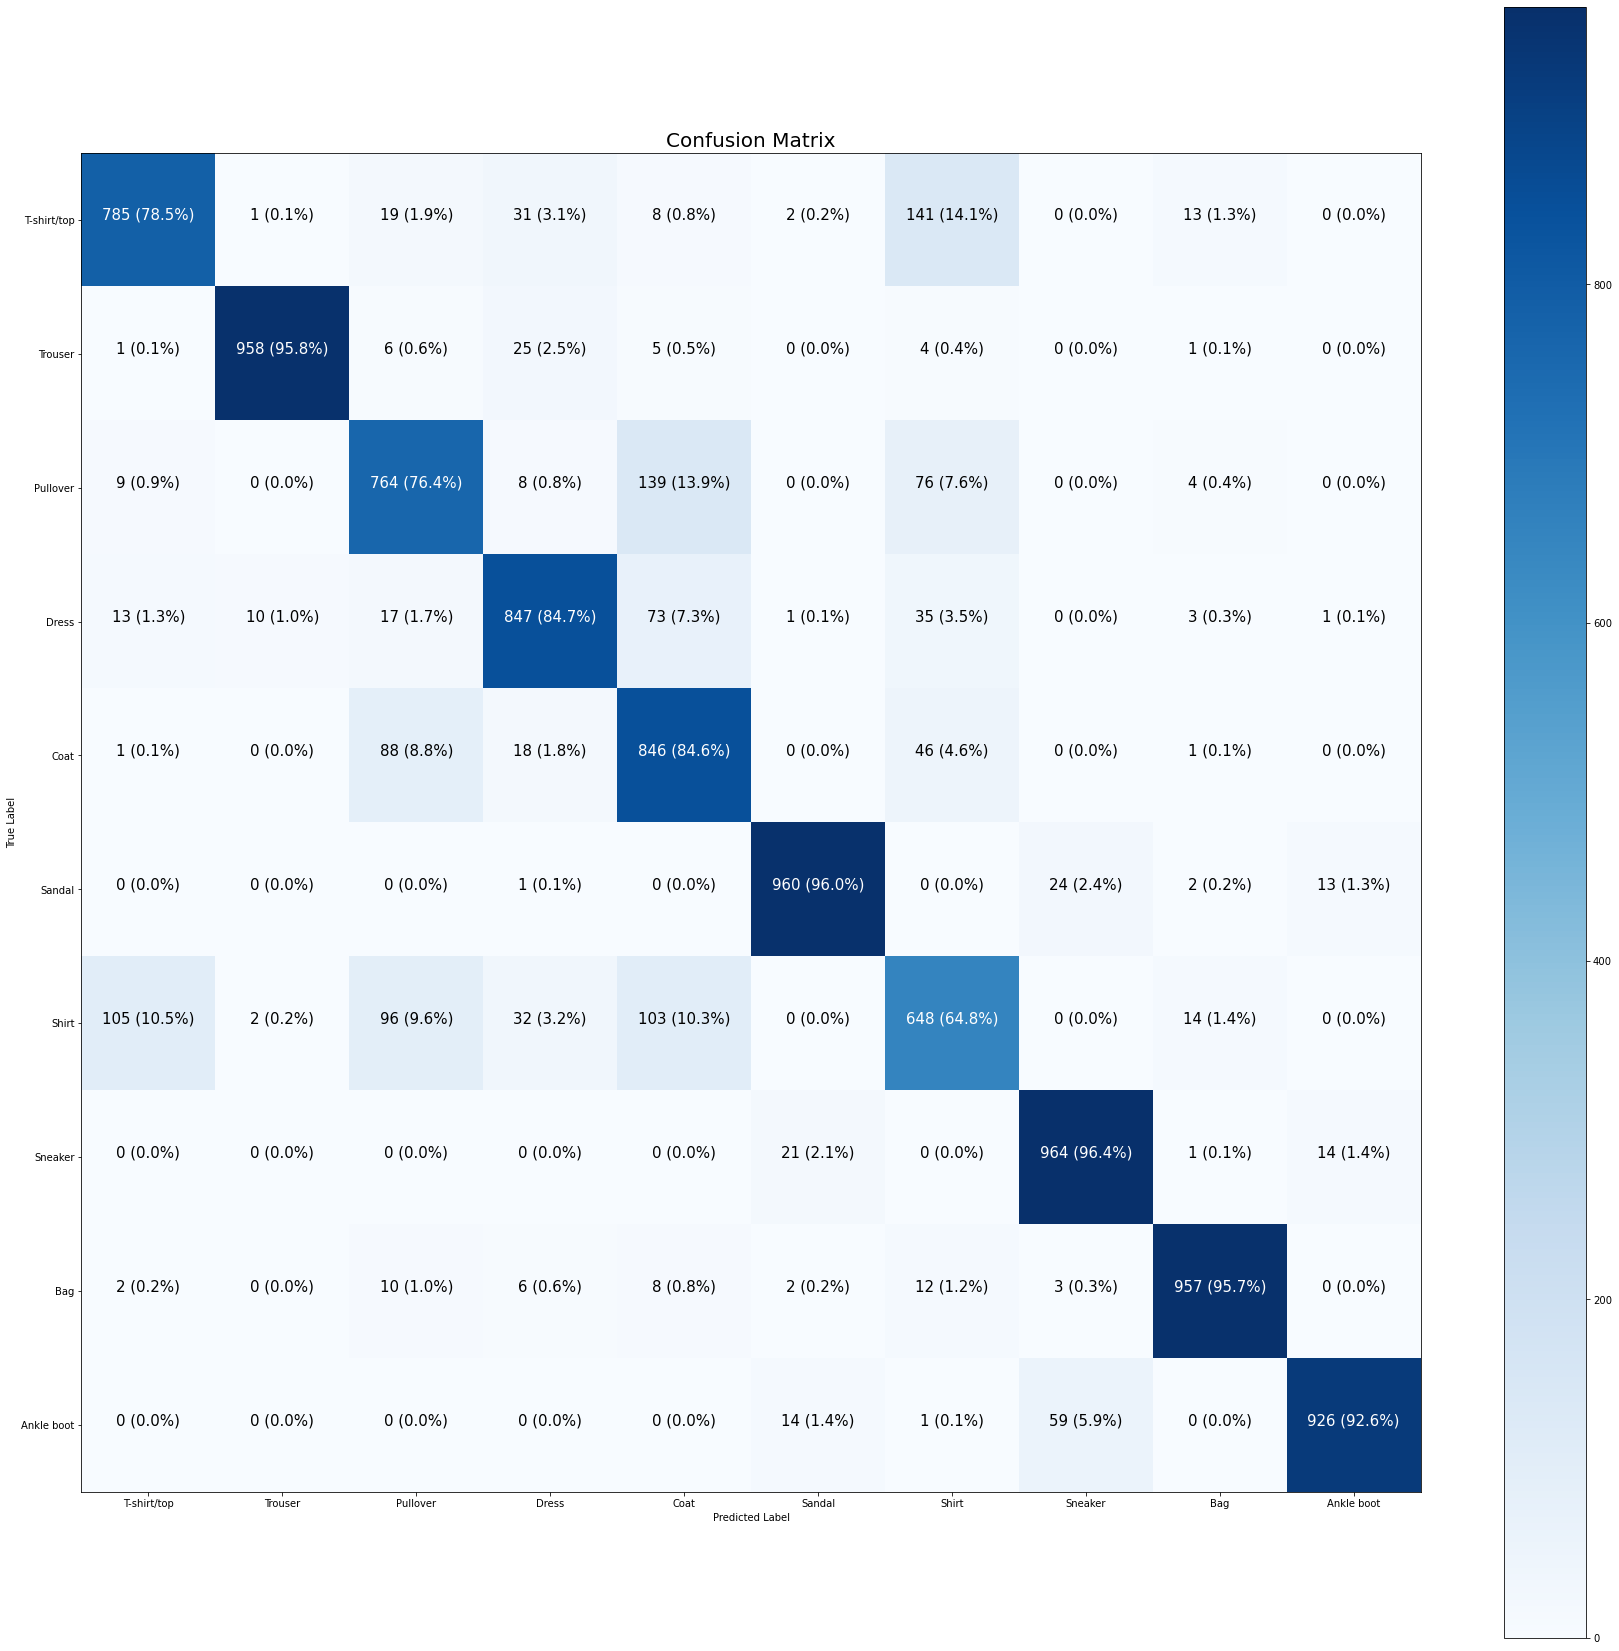

In [16]:

PrettyConfusionMatrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names,
                     figsize=(30,30),
                     text_size=10)

In [54]:
#Multiple image plotter
import random
def plot_random_image_mul(model, images, true_labels, classes,x_number, y_number,text_size):
    """"
    Pics a image plot it with label 
    """
    plt.figure(figsize=(10,10))
    for a in range(x_number*y_number):
        #set up integer
        i = random.randint(0,len(images))
        #prediction
        target_image=images[i]
        pred_probs=model.predict(target_image.reshape(1,28,28))
        pred_label= classes[pred_probs.argmax()]
        true_label = classes[true_labels[i]]

        #plot iamge
        
        ax=plt.subplot(x_number, y_number,a+1)
        plt.imshow(target_image, cmap=plt.cm.binary)

        #change color labels for correct or false predictions
        if pred_label==true_label:
            color="green"
        else:
            color= "red"
            
        
        plt.title(f"Pred:{pred_label} {(tf.reduce_max(pred_probs)*100):2.0f}% True: {true_label}", color=color)
        ax.title.set_size(text_size)
        plt.axis(False)


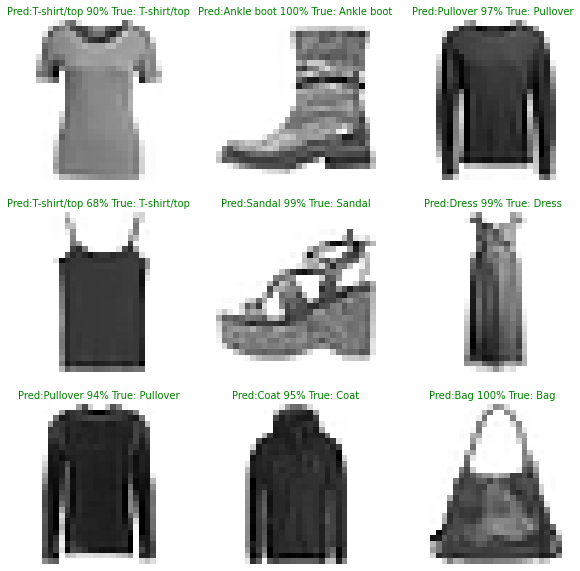

In [57]:
plot_random_image_mul(model= model_5,
                  images=test_data_norm,
                  true_labels= test_labels,
                  classes=class_names,
                     x_number=3,
                      y_number=3,
                     text_size=10)